In [1]:
import os
import sys
import pandas as pd
from glob import glob
import seaborn as sns
sys.path.append(os.path.abspath('../'))
import metaprofile_across_regions as mar

In [2]:
%%bash
conda env export > metaprofile.yml

In [3]:
# Sample annotation
annot = pd.read_csv('../../../data/general/SampleAnnotation.csv', index_col=0)

# Separate samples
# # Lin28A crosslinks
# lin28_xls = sorted(glob('../../../data/LIN28_220626_results/Crosslinks/*bed*'))

# ## Merged samples
# #Pabpc xlinks
# pabp_xls = glob('../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/*Crick*.bed.gz') + glob('../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/*Proteintech*.bed.gz')
# Lin28A crosslinks
lin28_xls = sorted(glob('../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-*bed*'))

dfPaths = pd.DataFrame()
dfPaths['Files'] = lin28_xls
dfPaths['Sample'] = dfPaths['Files'].apply(lambda x: x.split('/')[-1])
annot = annot.merge(dfPaths, on='Sample', how='inner')

# regions
regs = glob('ProfileRegions/*.bed*')
regDict = {}
for r in regs:
    c = r.split('cond-')[-1].split('.')[0]
    if c not in regDict.keys():
        regDict[c] = [r]
    else:
        regDict[c].append(r)

# Save to
outpath = '../../../results/Metaprofiles/Lin28aAroundPabpc/'
os.makedirs(f'{outpath}', exist_ok=True)

In [4]:
%%bash
nautilus ../../../results/Metaprofiles/

In [5]:
annot

,Sample,Protein,Condition,Experiment,Files
0,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_merg...,LIN28A,S200A_FCL,FLAG-IP LIN28A – merged,../../../data/LIN28_220626_results/Crosslinks/...
1,LIN28A-WT_ESC_LIF-CHIR_merged.bed.gz,LIN28A,S200WT_FCL,FLAG-IP LIN28A – merged,../../../data/LIN28_220626_results/Crosslinks/...
2,LIN28A-WT_ESCiLIF_merged.bed.gz,LIN28A,S200WT_2iL,FLAG-IP LIN28A – merged,../../../data/LIN28_220626_results/Crosslinks/...


In [6]:
regDict

{'S200WT_FCL': ['ProfileRegions/pabpc4_three_prime_filtered_peaks_w100_cond-S200WT_FCL.bed.gz',
  'ProfileRegions/pabpc4_five_prime_filtered_peaks_w100_cond-S200WT_FCL.bed.gz',
  'ProfileRegions/pabpc1_five_prime_filtered_peaks_w100_cond-S200WT_FCL.bed.gz',
  'ProfileRegions/pabpc1_three_prime_filtered_peaks_w100_cond-S200WT_FCL.bed.gz'],
 'S200WT_2iL': ['ProfileRegions/pabpc4_five_prime_filtered_peaks_w100_cond-S200WT_2iL.bed.gz',
  'ProfileRegions/pabpc1_three_prime_filtered_peaks_w100_cond-S200WT_2iL.bed.gz',
  'ProfileRegions/pabpc4_three_prime_filtered_peaks_w100_cond-S200WT_2iL.bed.gz',
  'ProfileRegions/pabpc1_five_prime_filtered_peaks_w100_cond-S200WT_2iL.bed.gz'],
 'S200A_FCL': ['ProfileRegions/pabpc4_three_prime_filtered_peaks_w100_cond-S200A_FCL.bed.gz',
  'ProfileRegions/pabpc4_five_prime_filtered_peaks_w100_cond-S200A_FCL.bed.gz',
  'ProfileRegions/pabpc1_three_prime_filtered_peaks_w100_cond-S200A_FCL.bed.gz',
  'ProfileRegions/pabpc1_five_prime_filtered_peaks_w100_cond-S2

['../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_merged.bed.gz']
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
['../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-WT_ESCiLIF_merged.bed.gz']
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201
['../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-WT_ESC_LIF-CHIR_merged.bed.gz']
All regions have the same length: 201
All regions have the same length: 201
All regions

/home/klara/Dropbox (The Francis Crick)/klara/Projects/LIN28/analysis/Metaprofiles/metaprofile_across_regions.py:142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


All regions have the same length: 201
All regions have the same length: 201
All regions have the same length: 201


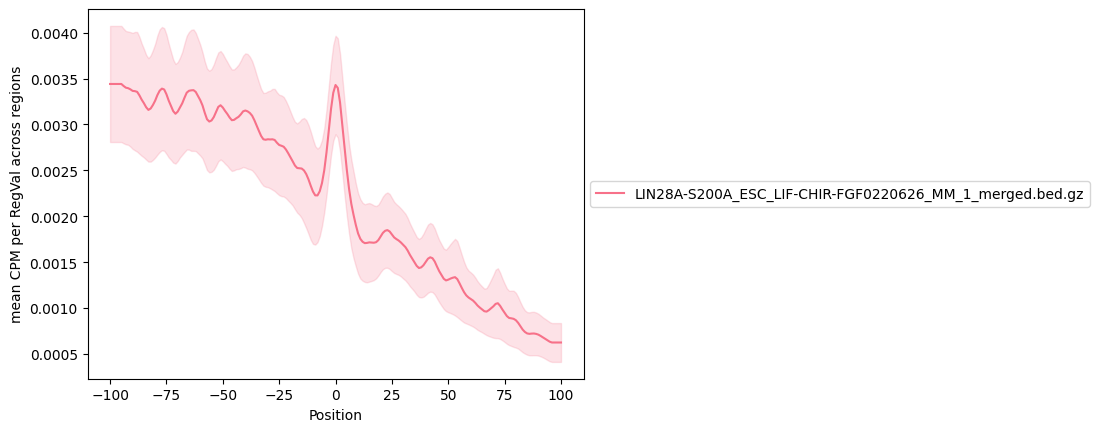

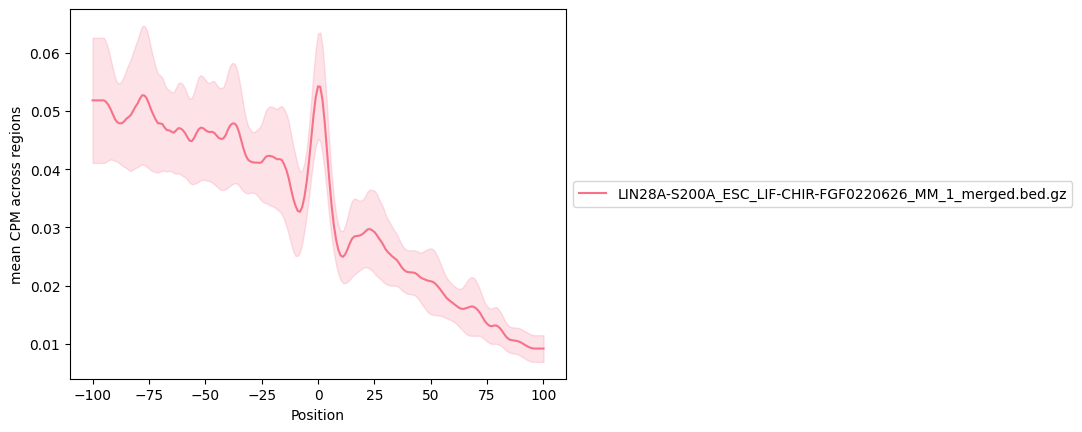

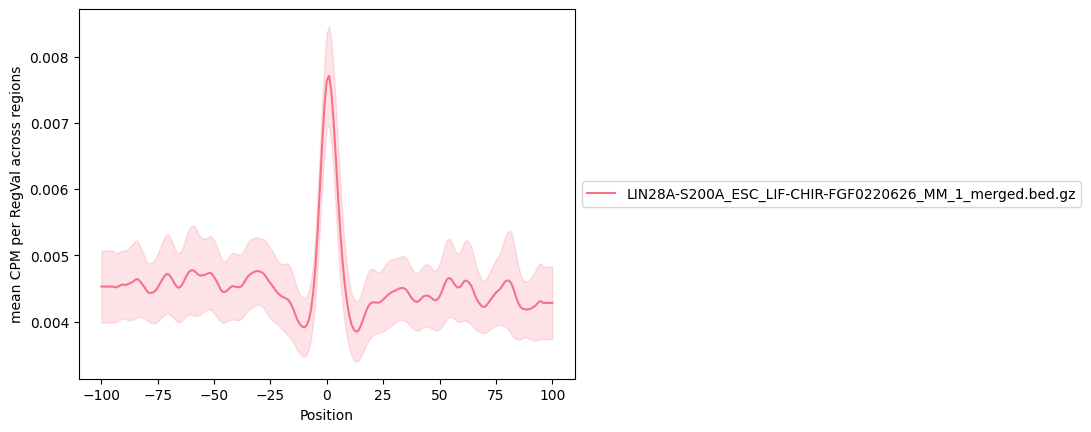

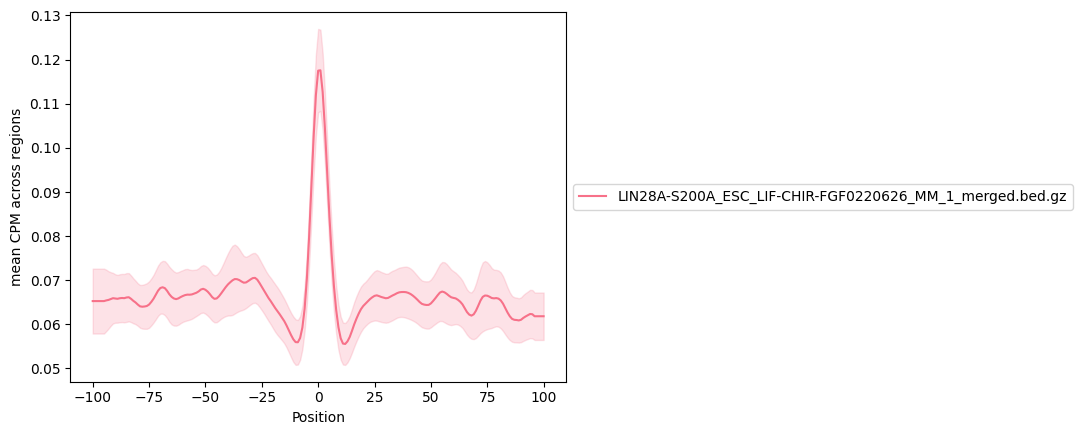

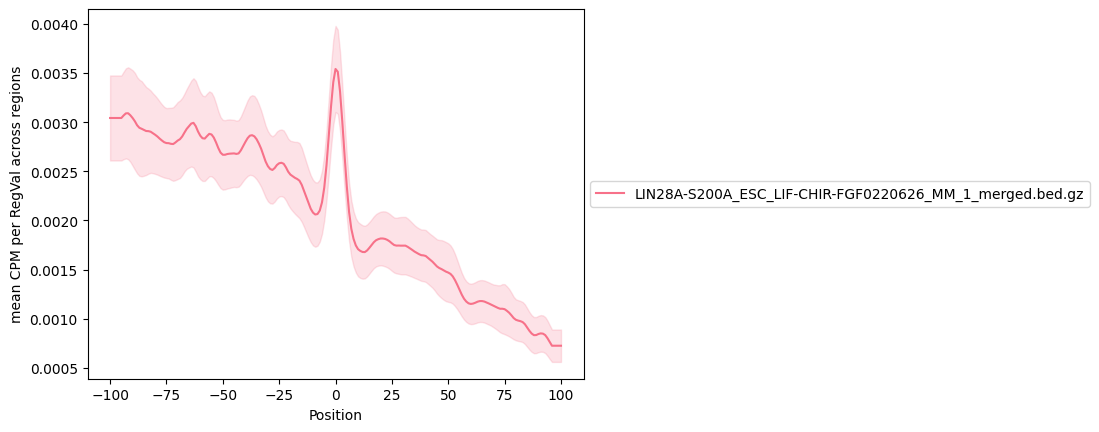

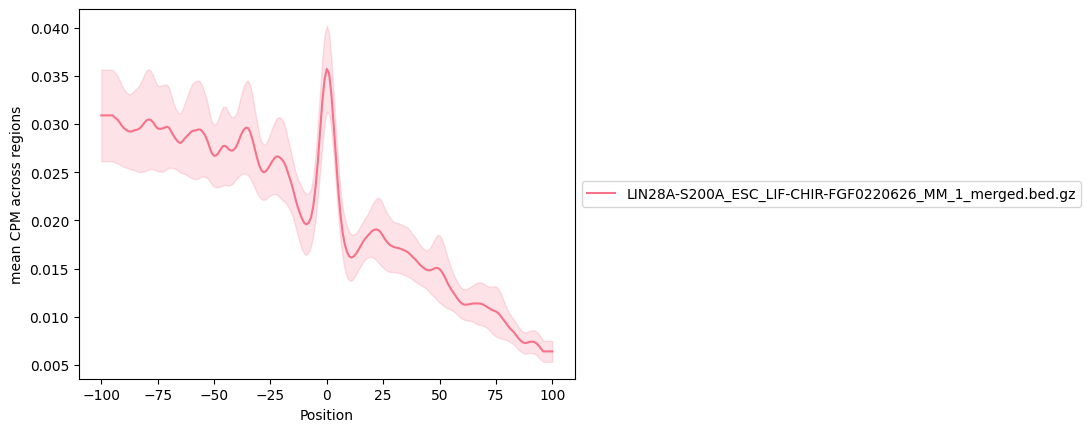

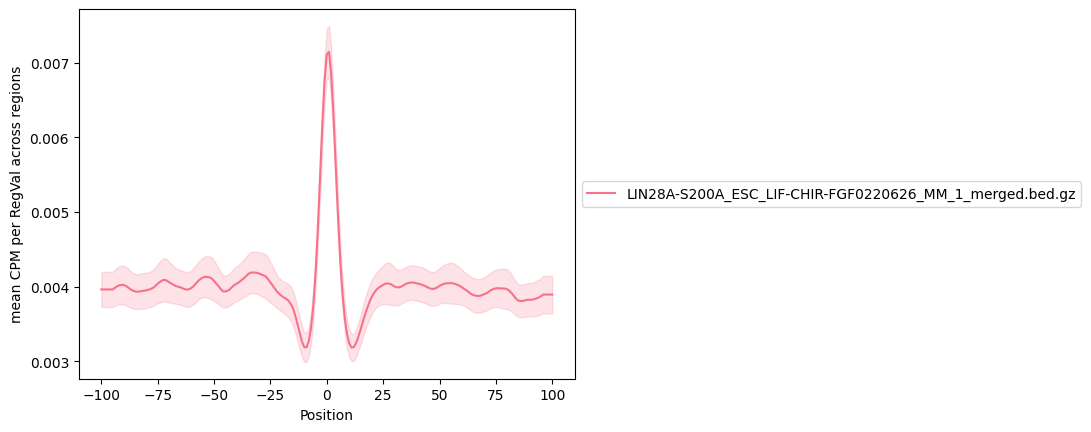

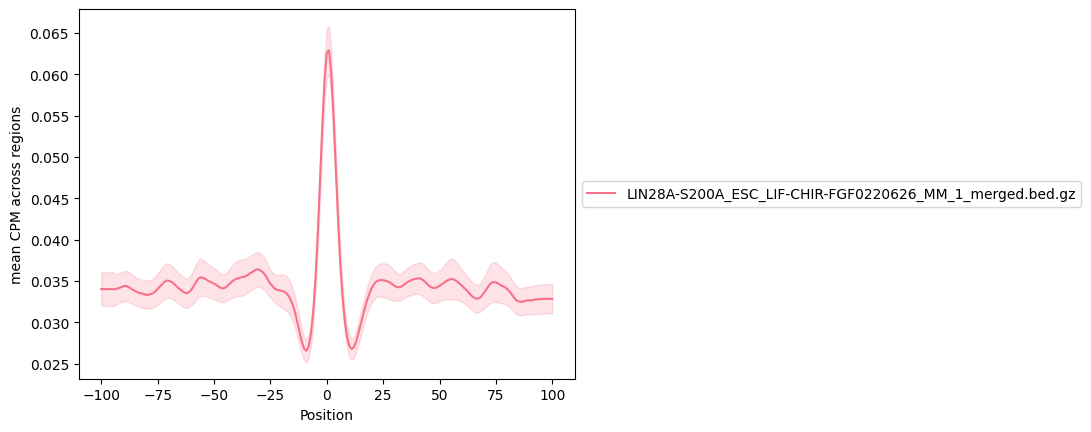

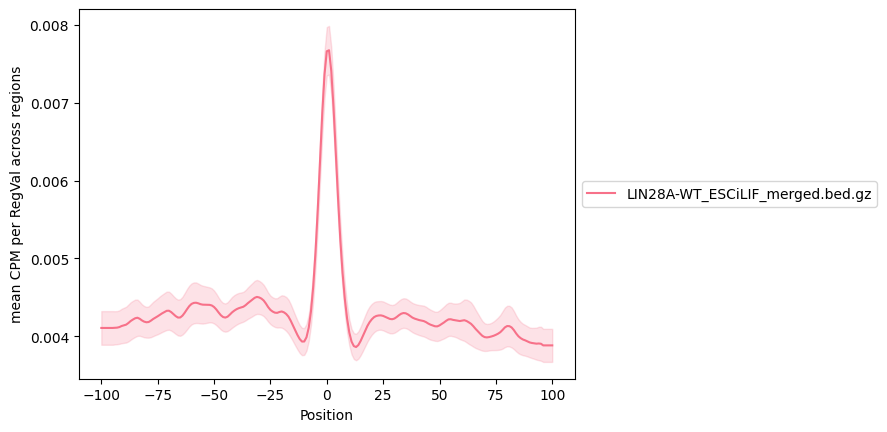

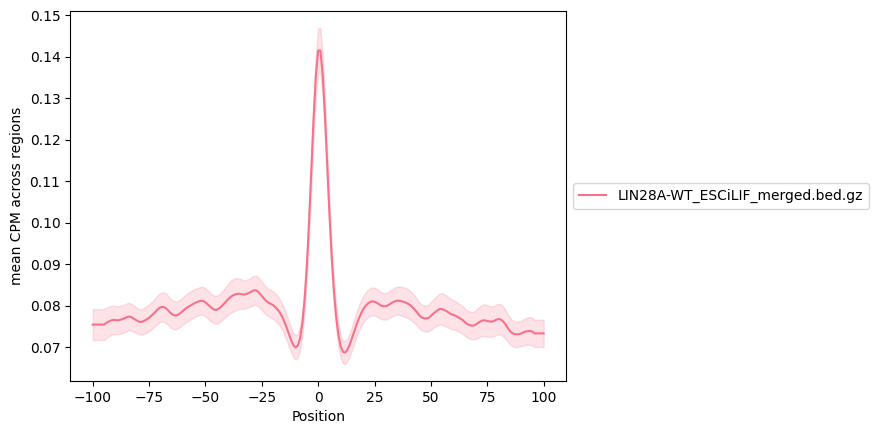

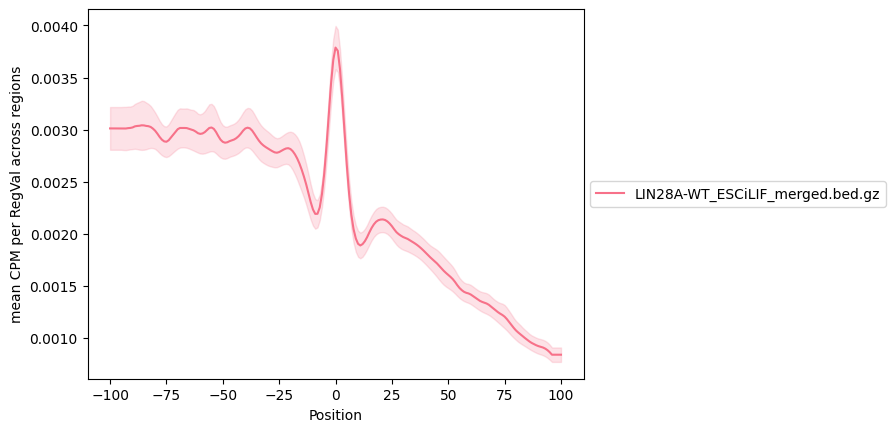

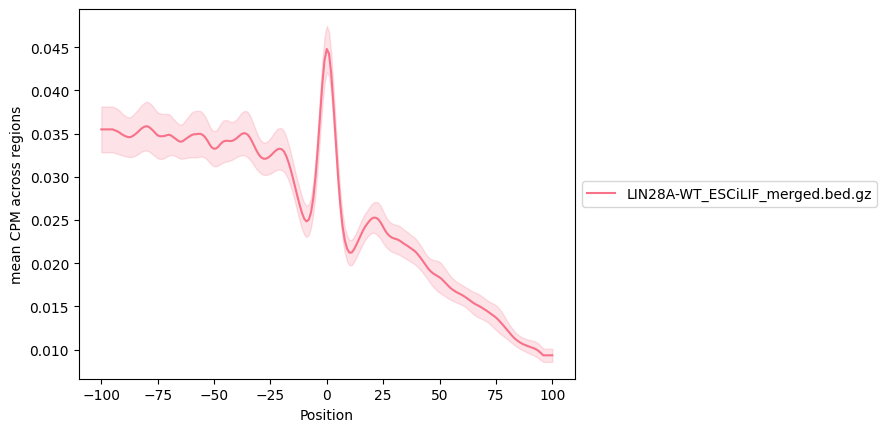

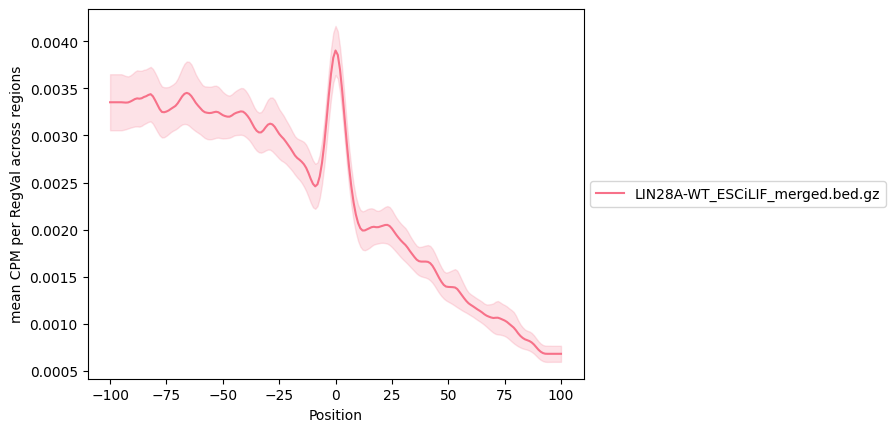

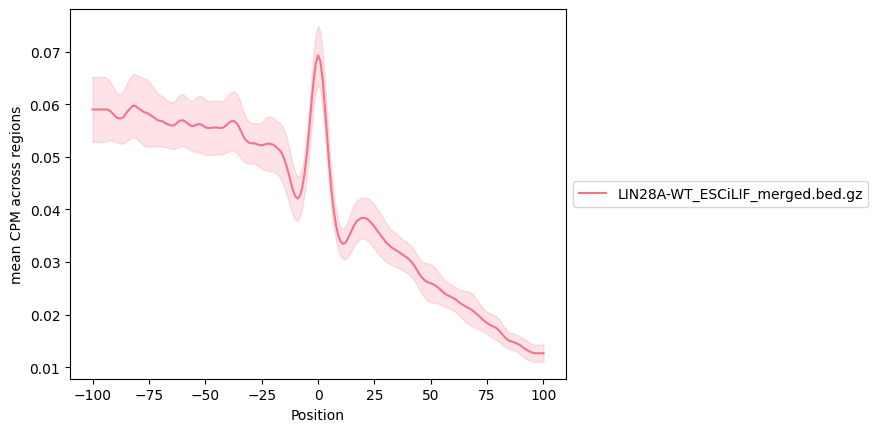

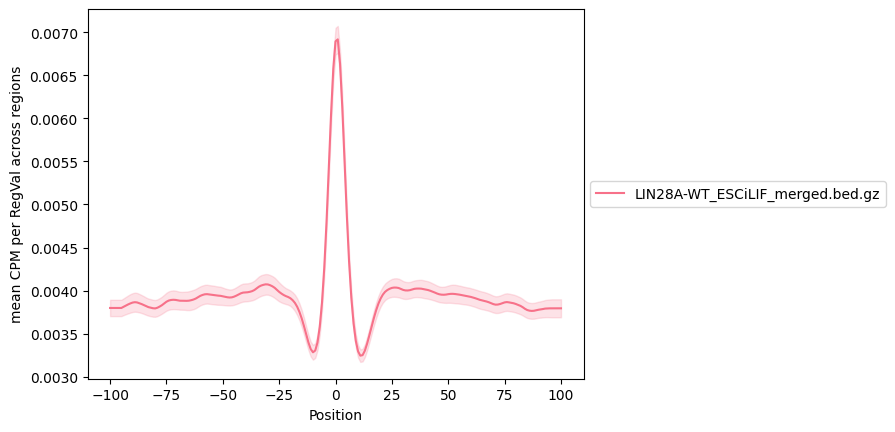

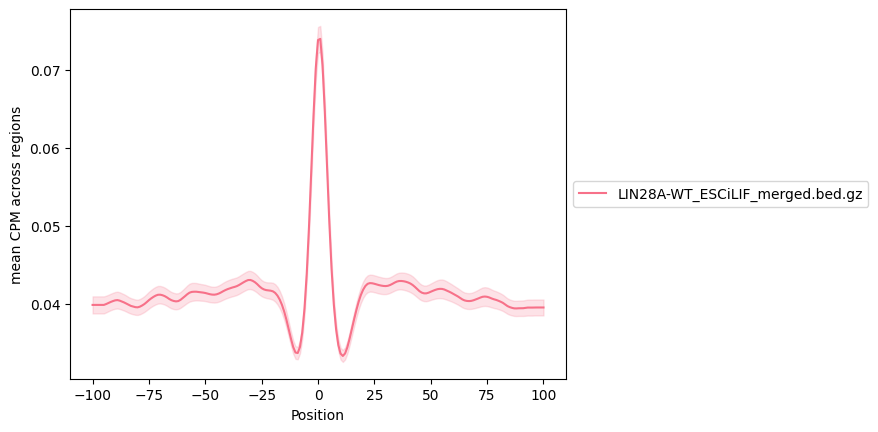

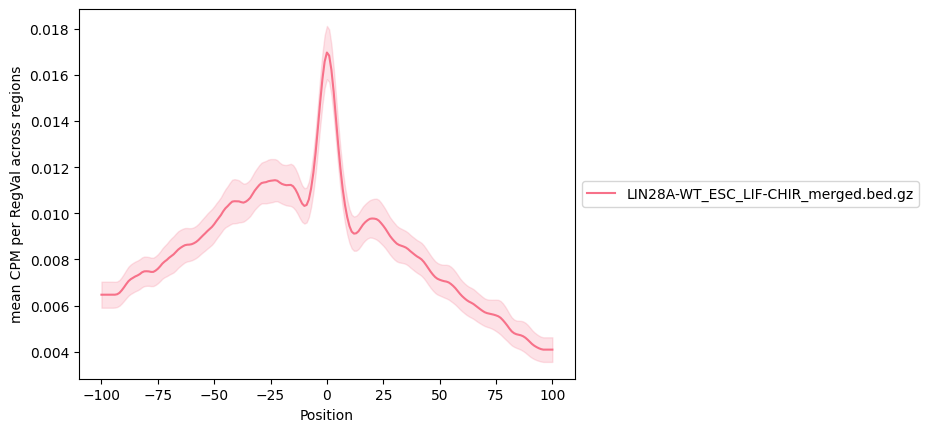

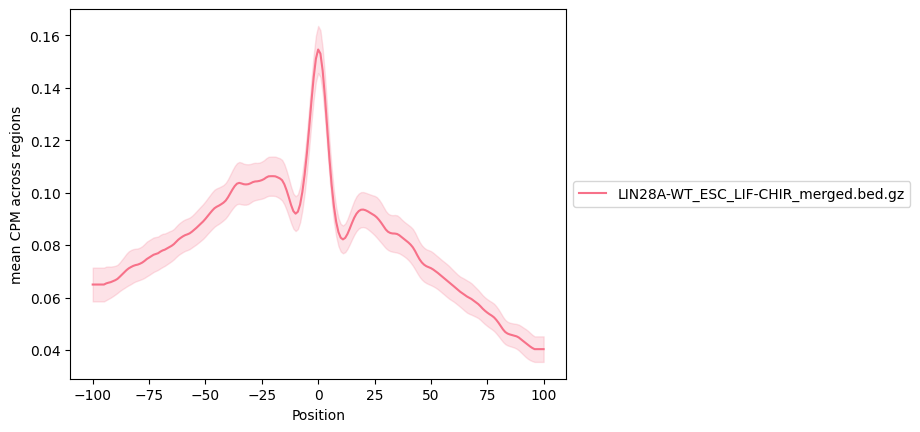

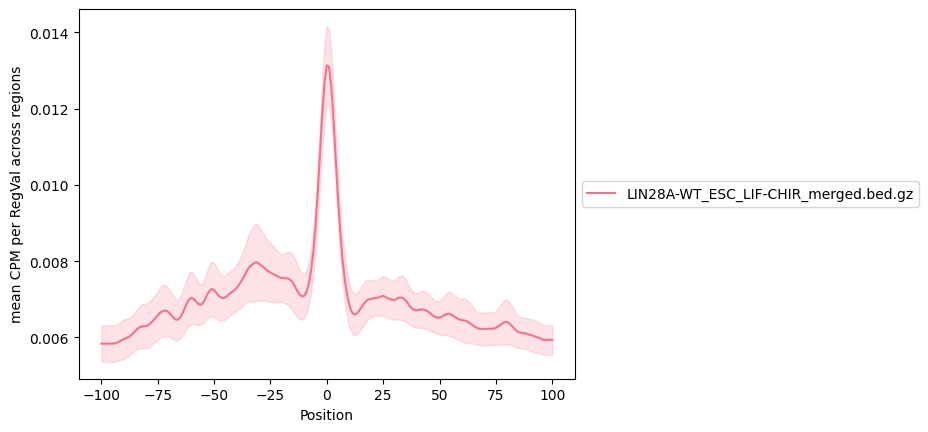

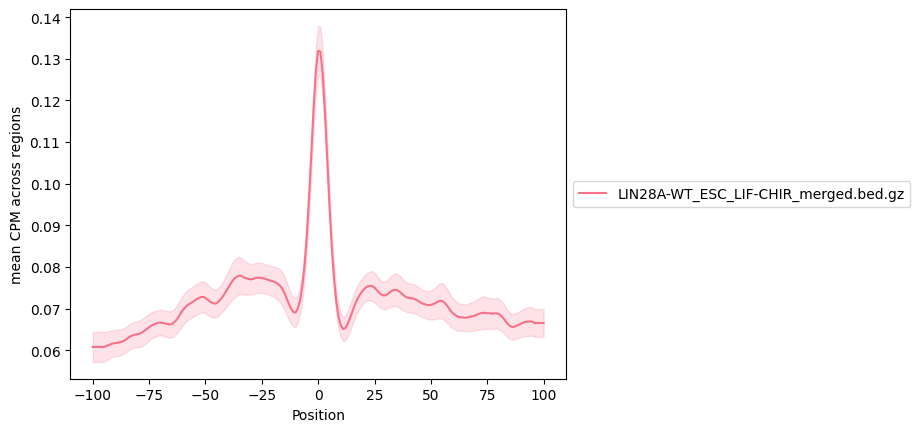

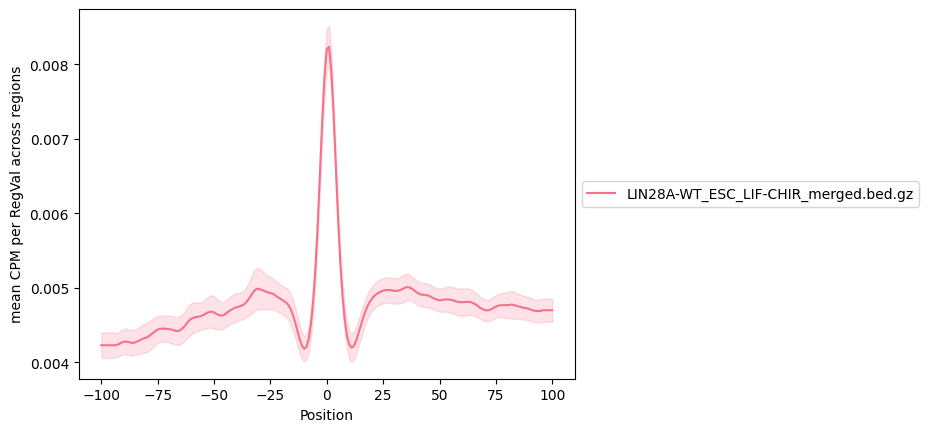

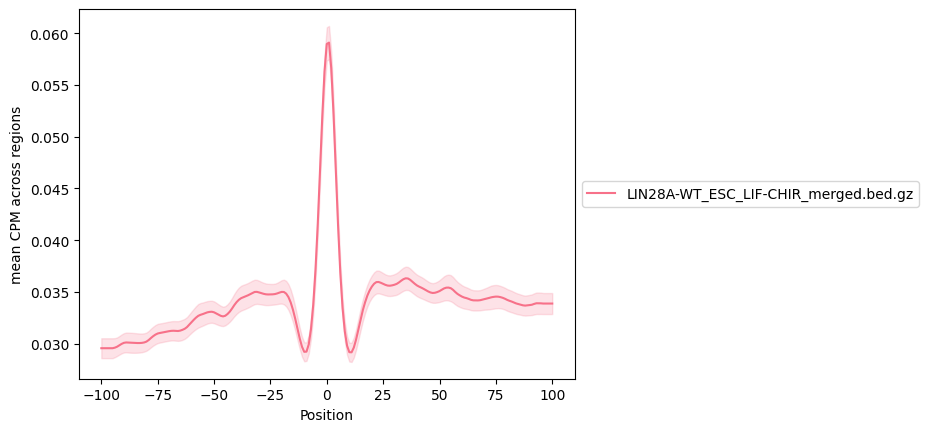

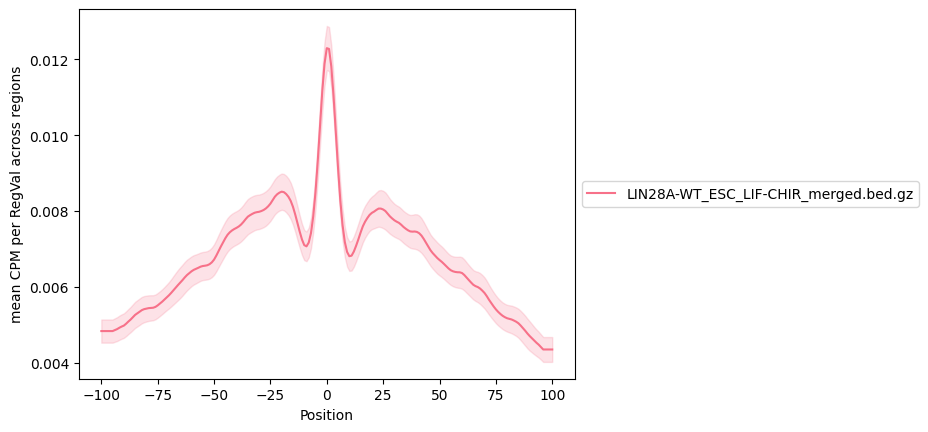

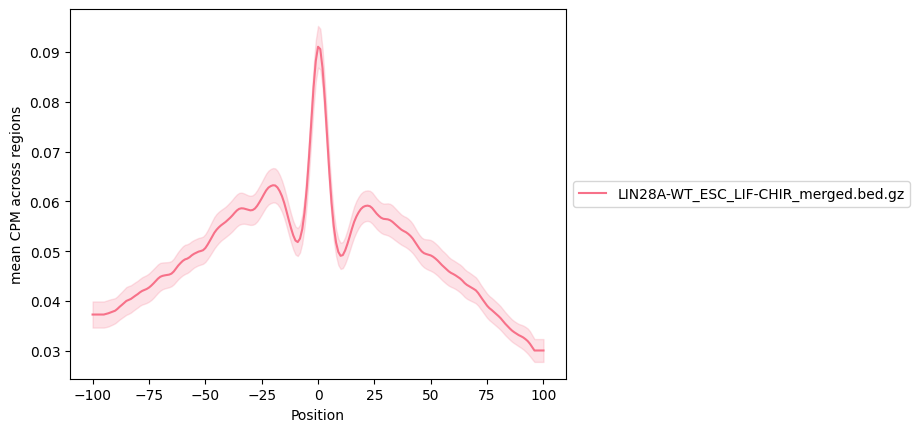

In [7]:
for c, df in annot.groupby('Condition'):
    regs = regDict[c]
    files = df.Files.values.tolist()
    print(files)
    for r in regs:
        out = r.split('/')[-1].split('.')[0].replace('_filtered_peaks_w100', '')
        mar.main(r, files, outpath=f'{outpath}/{out}', use_scores=True, sw=10, norm='by_reg', chunk_size=100000, pos_limits=(-100, 100))
        mar.main(r, files, outpath=f'{outpath}/{out}', use_scores=True, sw=10, norm='libsize', chunk_size=100000, pos_limits=(-100, 100))
